In [107]:
import numpy
import scipy.special
import os
import matplotlib.pyplot
import statistics

In [108]:
# neural network class definition
class neuralNetwork:
# initialise the neural network
    def __init__(self,inputnodes,outputnodes,hiddennodes,learningrate):
        self.inodes=inputnodes
        self.onodes=outputnodes
        self.hnodes=hiddennodes
        self.lr=learningrate
        self.wih=numpy.random.normal(0.0,pow(self.hnodes,-0.5),(self.hnodes,self.inodes))
        self.who=numpy.random.normal(0.0,pow(self.onodes,-0.5),(self.onodes,self.hnodes))
        self.activation_function=lambda x:scipy.special.expit(x)
        pass
# train the neural network
    def train(self,inputs_list,targets_list):
        inputs=numpy.array(inputs_list,ndmin=2).T
        targets=numpy.array(targets_list,ndmin=2).T
        hidden_inputs=numpy.dot(self.wih,inputs)
        hidden_outputs=self.activation_function(hidden_inputs)
        final_inputs=numpy.dot(self.who,hidden_outputs)
        final_outputs=self.activation_function(final_inputs)
        output_errors=targets-final_outputs
        
        hidden_errors=numpy.dot(self.who.T,output_errors)
        self.who+=self.lr*numpy.dot((output_errors*final_outputs*(1.0-final_outputs)),numpy.transpose(hidden_outputs))
        self.wih+=self.lr*numpy.dot((hidden_errors*hidden_outputs*(1.0-hidden_outputs)),numpy.transpose(inputs))
        pass
# query the neural network
    def query(self,inputs_list):
        inputs=numpy.array(inputs_list,ndmin=2).T
        
        hidden_inputs=numpy.dot(self.wih,inputs)
        
        hidden_outputs=self.activation_function(hidden_inputs)
        final_inputs=numpy.dot(self.who,hidden_outputs)
        
        final_outputs=self.activation_function(final_inputs)
        return final_outputs
        

In [109]:
path=os.getcwd()

In [110]:
os.listdir(path)

['mnist_train_100.csv',
 'test.ipynb',
 'book.ipynb',
 'mnist_test_10.csv',
 'makenn.ipynb',
 '.ipynb_checkpoints']

In [120]:
input_nodes=784
output_nodes=10
hidden_nodes=100
learning_rate=0.3
n=neuralNetwork(input_nodes,output_nodes,hidden_nodes,learning_rate)

training_data_file=open('mnist_train_100.csv','r')
training_data_list=training_data_file.readlines()
training_data_file.close()
for e in range(10):
    for record in training_data_list:
        all_values=record.split(',')
        inputs=(numpy.asfarray(all_values[1:])/255.0*0.99)+0.01
        targets=numpy.zeros(output_nodes)+0.01
        targets[int(all_values[0])]=0.99
        n.train(inputs,targets)
        pass
    pass

In [121]:
test_data_file=open(path+'/mnist_test_10.csv','r')
test_data_list=test_data_file.readlines()
test_data_file.close()

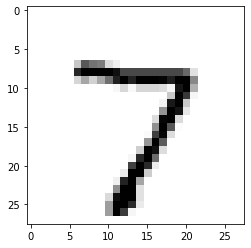

In [122]:
all_values=test_data_list[0].split(',')
image_array=numpy.asfarray(all_values[1:]).reshape(28,28)
matplotlib.pyplot.imshow(image_array,cmap='Greys',interpolation='None')

In [123]:
print(len(all_values))

785


In [124]:
x=(numpy.asfarray(all_values[1:])/255*0.99+0.01)

In [125]:
(n.query(x))

array([[0.02116325],
       [0.00519895],
       [0.01834537],
       [0.00754473],
       [0.00317488],
       [0.05823527],
       [0.0020362 ],
       [0.97952836],
       [0.00709172],
       [0.01966202]])